In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data Importing

In [2]:
#importing all applicable libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn import linear_model, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, r2_score, mean_squared_error, median_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.24.1
Numpy version=1.20.1
Pandas version=1.2.4
Matplotlib version=3.3.4
Python version=3.8.8


# Exploratory Data Analysis

In [3]:
#importing CSV file into the terminal

raw_data = pd.read_csv('/Users/Yimin/Documents/SP/Applied Machine Learning/CA1/house sales predictions/kc_house_data.csv')

raw_data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Details of raw data
print(raw_data.info())
print(raw_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

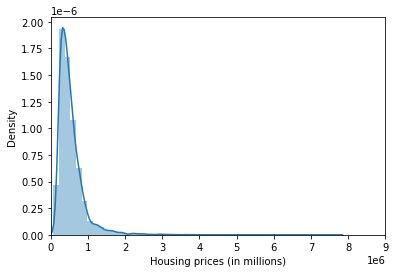

In [20]:
#Creating a distplot to observe distribution of housing prices


sns.distplot(raw_data['price'])
plt.xlabel('Housing prices (in millions)')
plt.xlim(0,9000000)

plt.show()

#As observed from the distplot, the distribution of houisng prices is negatively skewed, with most of the housing prices costing below 2 million USD

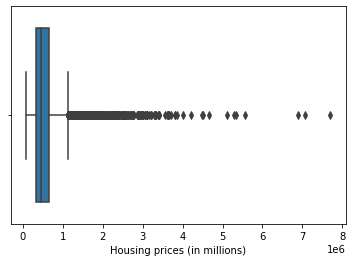

In [6]:
#Creating a boxplot to observe the distribution of housing prices


sns.boxplot(raw_data['price'])
plt.xlabel('Housing prices (in millions)')

plt.show()

#As verified from the distplot above, most of the outliers are houses costing above ~1.2 million. These outliers will be removed in the data processing step below.

In [7]:
#An overview of how the features correlate to each other. As observed under the price row/column, sqft_living, grade, sqft_living15 have the highest correlation with housing prices
raw_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


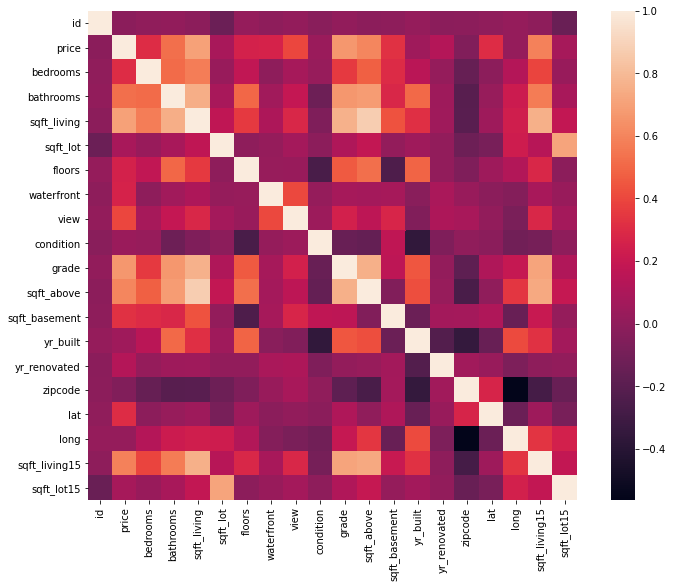

In [8]:
#The above data can also be represented in the heatmap below. 

corrmat = raw_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,  square=True);

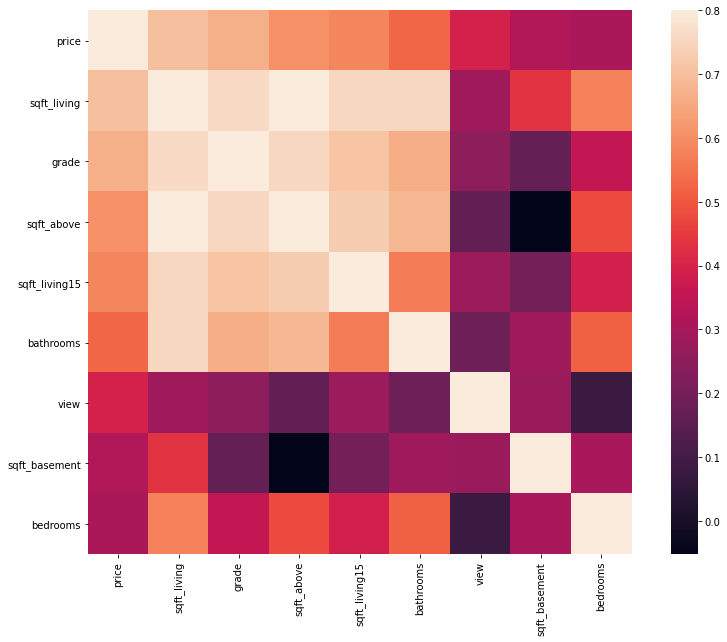

In [9]:
#Observing the top 8 features that correlates to housing prices.
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(raw_data[cols].corr(), vmax=.8, square=True);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


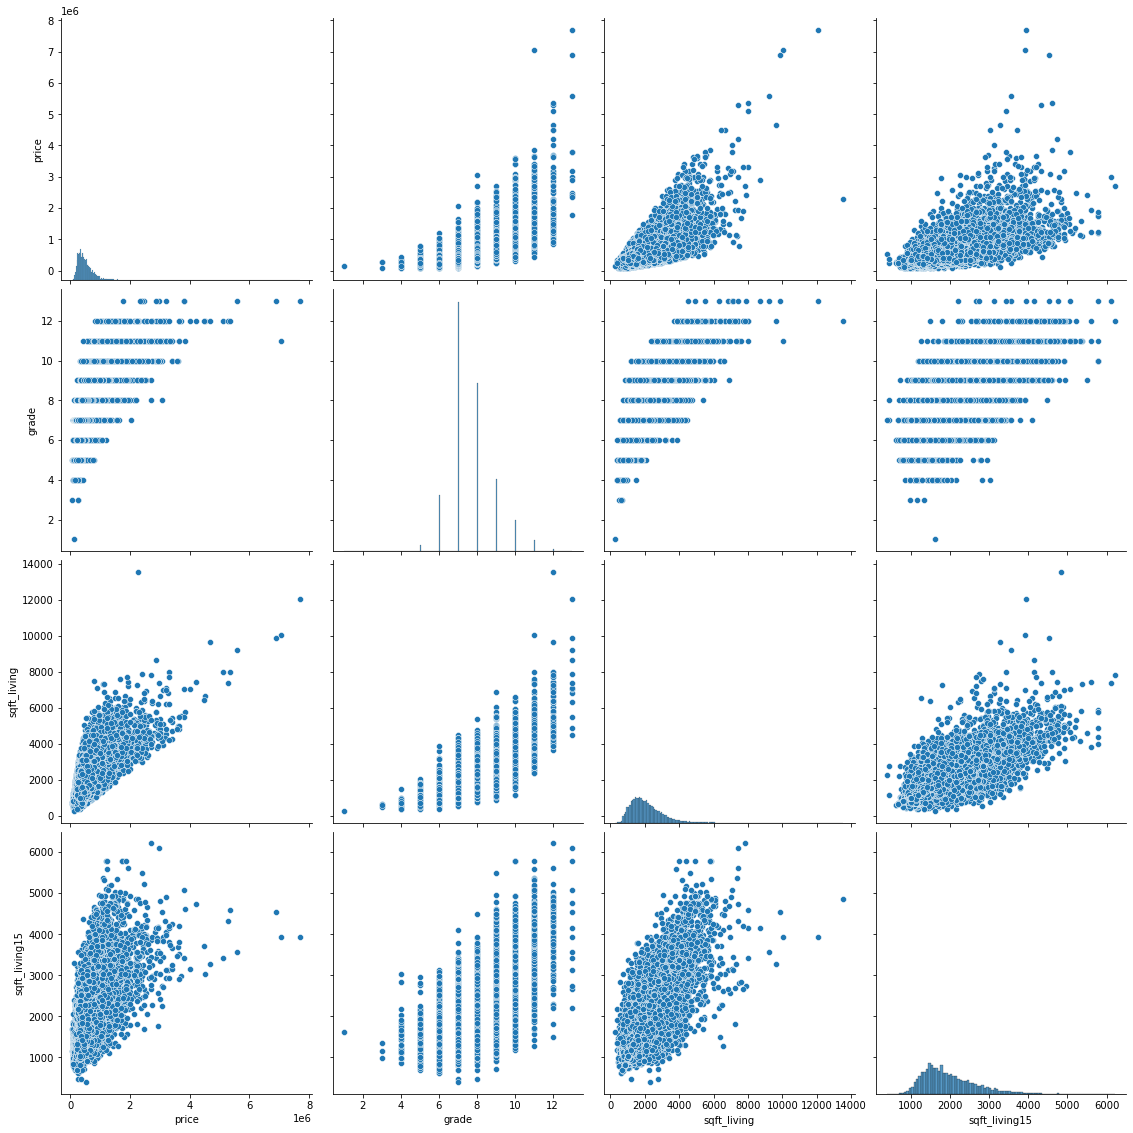

In [10]:
#Analyzing the top 3 variables directly contributing to changes in housing prices. As can be seen below, the features seems to be positively correlated with housing prices, with some outliers.
cols = ['price', 'grade', 'sqft_living', 'sqft_living15']
sns.pairplot(raw_data[cols], size = 4);

# Data Preparation

In [11]:
#replacing values of outliers for house prices with null values. Data is transformed by adding an additional column, applying numpy log on the price data. 

raw_data['price_log'] = np.log(raw_data['price'])

#removing the houseprices null values
raw_data=raw_data.dropna()

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
#in addition, it is also noticed that some of the less correlated features have a high number of zeros in its dataset. These will also be monitored and removed accordingly.
zeros = pd.DataFrame((raw_data==0).sum())
zeros

,0
id,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,21450
view,19489


In [13]:
#Dropping columns with high number of zeros. ID and date has also been removed as it does not have much correlation with the housing prices.
new_data = raw_data.drop(columns=['waterfront', 'view', 'sqft_basement', 'yr_renovated', 'date', 'id'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  price_log      21613 non-null  float64
dtypes: float64(6), int64(10)
memory usage: 2.8 MB


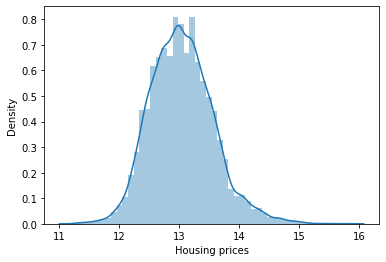

In [25]:
#Creating a distplot to observe distribution of housing prices after transformation


sns.distplot(new_data['price_log'])
plt.xlabel('Housing prices')

plt.show()

#After transforming the data, housing prices appears to be much more evenly distributed

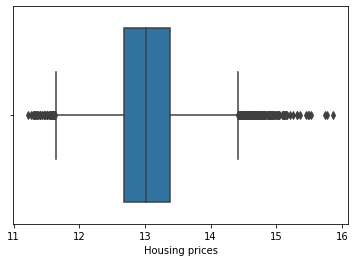

In [24]:
#Creating a boxplot to observe the distribution of housing prices


sns.boxplot(new_data['price_log'])
plt.xlabel('Housing prices')

plt.show()

#Similarly for the boxplot, the data looks more evenly distributed, with less outliers on the extreme right of the values.

<AxesSubplot:xlabel='sqft_living', ylabel='price_log'>

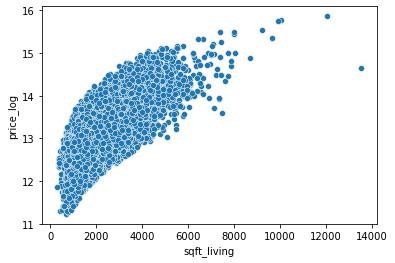

In [26]:
sns.scatterplot(x=new_data['sqft_living'], y=new_data['price_log'])

#based on the scatterplot below, there seems to be still some extreme values on the right (with >12000 sqft living area). We will attempt to remove this outliers in the next cell.

<AxesSubplot:xlabel='sqft_living', ylabel='price_log'>

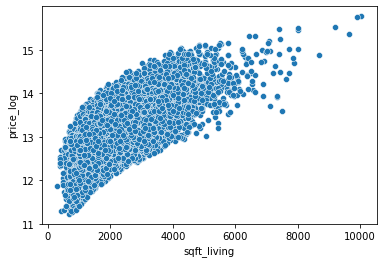

In [27]:
#Removing the data from the extreme ends
new_data = new_data[new_data['sqft_living']<=12000]
sns.scatterplot(x=new_data['sqft_living'], y=new_data['price_log'])

# Train Model

In [28]:
#identifying the dataset features to be included as X and y values
X = new_data.drop(columns=['price', 'price_log'])
y = new_data['price_log']

#splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=.1)

In [29]:
#Using Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [30]:
#Using Decision Tree Regression
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

In [31]:
#Using Support Vector Regression
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
y_pred2 = svr.predict(X_test)

In [32]:
#Using KNN
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

In [33]:
#Using Ensemble Gradient Boosting Regressor - Model 1
ens = ensemble.GradientBoostingRegressor(n_estimators = 400, 
                                         max_depth = 5, 
                                         min_samples_split = 2, 
                                         learning_rate = 0.1, 
                                         loss = 'ls')
ens.fit(X_train, y_train)
y_pred4 = ens.predict(X_test)

# Model evaluation

In [34]:
#Finding the best model
results = pd.DataFrame({
    'Models': ['Linear Regression', 'Decision Tree', 'SVR','KNeighborsRegressor',
              'Gradient Boosting Regressor'], 
    'r^2 Score - Training': [lr.score(X_train, y_train), dt.score(X_train, y_train), svr.score(X_train, y_train), knn.score(X_train, y_train), ens.score(X_train, y_train)],
    'r^2 Score - Test' : [r2_score(y_test, y_pred), r2_score(y_test, y_pred1), r2_score(y_test, y_pred2), 
              r2_score(y_test, y_pred3), r2_score(y_test, y_pred4)]})
result_df = results.sort_values(by=['r^2 Score - Training', 'r^2 Score - Test'], ascending=False)
result_df = result_df.set_index('Models')
result_df.head()

,r^2 Score - Training,r^2 Score - Test
Models,,
Decision Tree,0.996784,0.766580
Gradient Boosting Regressor,0.943002,0.900503
Linear Regression,0.756372,0.752465
KNeighborsRegressor,0.737702,0.462408
SVR,0.513042,0.514959


In [36]:
#Because of the consistency of the prediction scores and the high results produced for both test and training sets as produced by Gradient Boosting Regressor, the hyperparameters will be tuned. However, due to the complexity of the dataset and the high consumption of time required to perform a comprehensive hyperparameter tuning by identifying the best_params, parameter values have been tuned manually to determine which Gradient boosting Regression model gives the best score.

#Hyperparameter tuning 1 - Gradient Boosting Regressor Model 2
ens1 = ensemble.GradientBoostingRegressor(n_estimators = 1000, 
                                         max_depth = 5, 
                                         min_samples_split = 2, 
                                         learning_rate = 0.1, 
                                         loss = 'ls')
ens1.fit(X_train, y_train)
y_pred5 = ens1.predict(X_test)

In [37]:
#Hyperparameter tuning 1 - Gradient Boosting Regressor Model 3
ens2 = ensemble.GradientBoostingRegressor(n_estimators = 1000, 
                                         max_depth = 7, 
                                         min_samples_split = 2, 
                                         learning_rate = 0.1, 
                                         loss = 'ls')
ens2.fit(X_train, y_train)
y_pred6 = ens2.predict(X_test)


In [38]:
#Hyperparameter tuning 1 - Gradient Boosting Regressor Model 4
ens3 = ensemble.GradientBoostingRegressor(n_estimators = 1000, 
                                         max_depth = 5, 
                                         min_samples_split = 500, 
                                         learning_rate = 0.1, 
                                         loss = 'ls')
ens3.fit(X_train, y_train)
y_pred7 = ens3.predict(X_test)

In [39]:
#Results of the different Gradient Boosting Regressor employed
results1 = pd.DataFrame({
    'Gradient Boosting Regressor Models': ['Model 1', 'Model 2', 'Model 3',
              'Model 4'], 
    'r^2 Score - Training': [ens.score(X_train, y_train), ens1.score(X_train, y_train), ens2.score(X_train, y_train), ens3.score(X_train, y_train)],
    'r^2 Score - Test' : [r2_score(y_test, y_pred4), r2_score(y_test, y_pred5), r2_score(y_test, y_pred6), r2_score(y_test, y_pred7), ]})

results1 = results1.set_index('Gradient Boosting Regressor Models')
results1.head()

#As seen from the table below, Gradient Boosting Regressor model 2 seems to yield the best training and test results. Hence we will evaluate this model against the baseline model using dummy regressor next.

,r^2 Score - Training,r^2 Score - Test
Gradient Boosting Regressor Models,,
Model 1,0.943002,0.900503
Model 2,0.967676,0.899625
Model 3,0.991261,0.894137
Model 4,0.936692,0.900044


In [40]:
#Comparing results to Dummy Regressor

# Create a dummy regressor with strategy as mean
sb = DummyRegressor(strategy="mean")
sb.fit(X_train, y_train)

y_predsb = sb.predict(X_test)

# Create a dummy regressor with strategy as constant
sbc = DummyRegressor(strategy='constant', constant=100)

# Train and evaluate dummy regressor
sbc.fit(X_train, y_train)

y_predsbc = sbc.predict(X_test)

In [42]:
#Results of Gradient Boosting Regressor model in comparison with the baseline model
results_final = pd.DataFrame({   'Models': ['Gradient Boosting Regressor - Model 1', 'Baseline Model - Mean', 'Baseline Model - Constant'], 
    'r^2 Score - Training': [ens.score(X_train, y_train), sb.score(X_train, y_train), sbc.score(X_train, y_train)],
    'r^2 Score - Test' : [r2_score(y_test, y_pred4), r2_score(y_test, y_predsb), r2_score(y_test, y_predsbc)]})

results_final = results_final.set_index('Models')
results_final.head()

,r^2 Score - Training,r^2 Score - Test
Models,,
Gradient Boosting Regressor - Model 1,0.943002,0.900503
Baseline Model - Mean,0.000000,-0.000004
Baseline Model - Constant,-27256.386312,-27721.490471


# Conclusion

In [43]:
#In conclusion, Gradient Boosting Regressor seems to yield the best results for both training and test datasets, given its high accuracy scores. As compared to a baseline model, the Gradient Boosting Regressor works the best in this large dataset provided. 